In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
(x_data,y_data),(t_x_data,t_y_data) = load_data()

plt.imshow(x_data[0],cmap='gray_r')

 CNN분류기
1. 모델을 만들어주세요
    - 컨벌루션2층
    - 뉴럴은 최소 1층
    - 모델의 형상을 출력
2. 학습 / 최적모델을  저장하시오
    - 조건을 부여하여 학습의 진행을 정지시켜라.
    - 검증 데이터를 이용하여 점수를 도출하시오
3. 시각화 작업
    - 테스트 데이터를 이용하여 입력을 통한 결과출력을 시각화하시오
    - 테스트 데이터를 이용하여 점수를 도출하시오
4. 모델피처 검토
    - 학습된 모델을 이용하여 컨벌루션 층의 피쳐들을 시각화하시오.

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
x_data.shape

(60000, 28, 28)

In [24]:
np.unique(y_data)

10

In [5]:
x_data=x_data.reshape(-1,28,28,1)/255.0
tt_x=t_x_data.reshape(-1,28,28,1)/255.0
tt_y=t_y_data
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [11]:
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same', input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(pool_size=(2,2)))      

In [12]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dense(10,activation='softmax'))
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [13]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
ck=keras.callbacks.ModelCheckpoint('best_sellect.h',save_best_only=True)
stop=keras.callbacks.EarlyStopping(patience=2)
his = m.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck,stop])

Epoch 1/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1432 - accuracy: 0.9560 - val_loss: 0.0626 - val_accuracy: 0.9811
Epoch 2/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 3/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0430 - val_accuracy: 0.9868
Epoch 4/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 6/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0413 - val_accuracy: 0.9889
Epoch 7/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0412 -

In [18]:
m2=keras.models.load_model('best_sellect.h')
m.evaluate(v_x,v_y),m2.evaluate(v_x,v_y)

375/375 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9907


([0.04116111248731613, 0.9905833601951599],
 [0.03448905050754547, 0.9906666874885559])

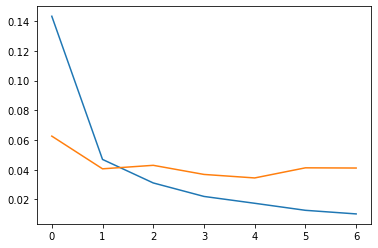

In [21]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

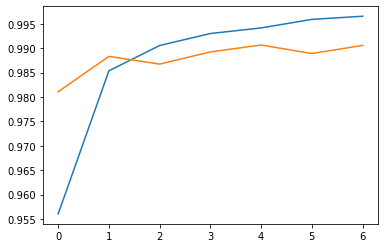

In [22]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.show()

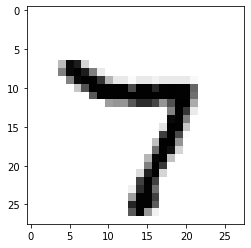

In [29]:
plt.imshow(v_x[0].reshape(28,28),cmap='gray_r')


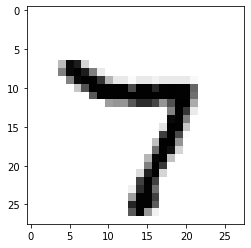

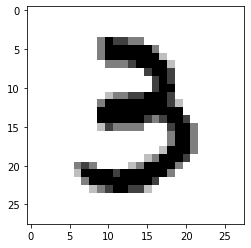

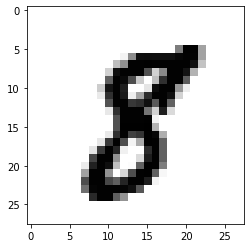

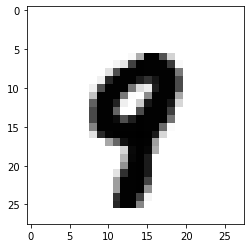

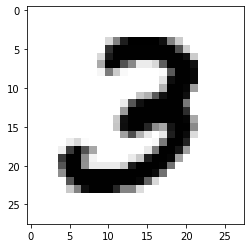

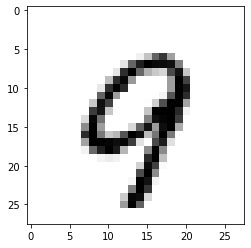

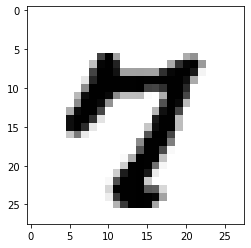

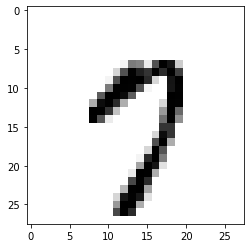

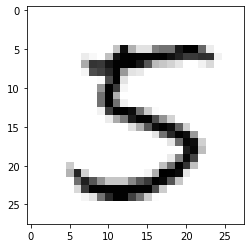

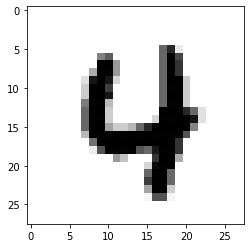

In [36]:
for i in range(len(np.unique(y_data))):
    plt.imshow(v_x[i].reshape(28,28),cmap='gray_r')
    plt.show()

In [37]:
m.layers

In [38]:
conv=m.layers[0]
conv.weights[0].shape,conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [39]:
end=list(np.unique(y_data))
y_l=m.predict(tt_x)

0


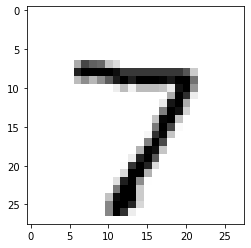

0


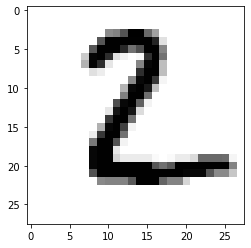

0


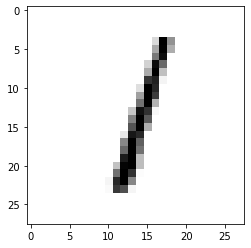

0


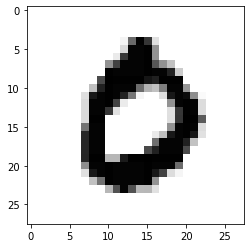

0


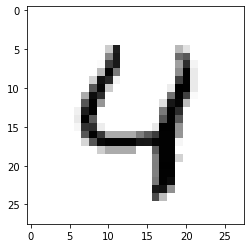

0


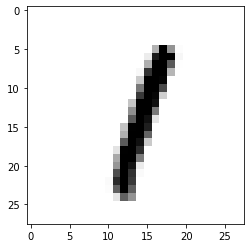

0


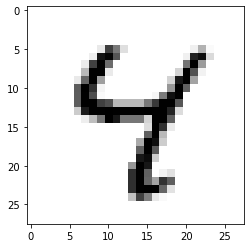

0


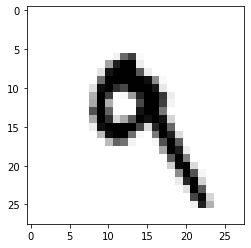

0


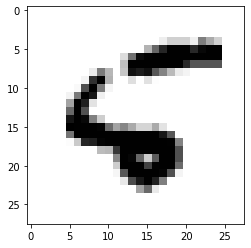

IndexError: index 10 is out of bounds for axis 1 with size 10

In [40]:
for i in range(len(y_l[100])):
    print(end[np.argmax(y_l[i,i+1])])
    plt.imshow(tt_x[i].reshape(28,28),cmap='gray_r')
    plt.show()

In [41]:
m_ck=keras.models.load_model('best_sellect.h')

In [42]:
w1=m_ck.layers[0].weights[0].numpy()

In [43]:
w2=m_ck.layers[2].weights[0].numpy()

In [ ]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(4):
    for j in range(32):
            axs[i,j].imshow(w2[:,:,0,i*32+j])
            axs[i,j].axis('off')

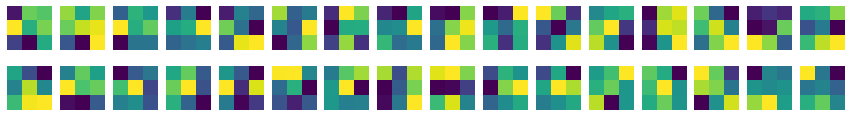

In [45]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
            axs[i,j].imshow(w2[:,:,0,i*32+j])
            axs[i,j].axis('off')